In this notebook we read a toy dataset and perform basic data cleaning and lexical analysis. 

## Contents

* [Read the dataset](#datasetreading)
* [Regular expressions](#regex)
* [EDA](#eda)
* [Stemming & Lemmatization](#stemming)
* [Tokenization](#tokenization)
* [Stop word removal](#stopword)

<a id='datasetreading'></a>

### Read the dataset

In [1]:
import pandas as pd

pd.options.display.max_colwidth = -1

data = pd.read_csv('amazon_reviews.csv') #for excel file use read_excel

In [2]:
print (data.shape)

(2277, 12)


In [3]:
data.head(10)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"08 22, 2013",A34A1UP40713F8,B00009W3I4,{'Style:': ' Dryer Vent'},James. Backus,I like this as a vent as well as something that will keep house warmer in winter. I sanded it and then painted it the same color as the house. Looks great.,Great product,1377129600,NaN,NaN
1,5.0,True,"02 8, 2016",A1AHW6I678O6F2,B00009W3PA,{'Size:': ' 6-Foot'},kevin.,good item,Five Stars,1454889600,NaN,NaN
2,5.0,True,"08 5, 2015",A8R48NKTGCJDQ,B00009W3PA,{'Size:': ' 6-Foot'},CDBrannom,Fit my new LG dryer perfectly.,Five Stars,1438732800,NaN,NaN
3,5.0,True,"04 24, 2015",AR3OHHHW01A8E,B00009W3PA,{'Size:': ' 6-Foot'},Calvin E Reames,Good value for electric dryers,Perfect size,1429833600,NaN,NaN
4,5.0,True,"03 21, 2015",A2CIEGHZ7L1WWR,B00009W3PA,{'Size:': ' 6-Foot'},albert j. kong,Price and delivery was excellent.,Five Stars,1426896000,NaN,NaN
5,5.0,True,"12 26, 2013",A1RQQV9HYHDHDN,B00009W3PA,{'Size:': ' 6-Foot'},Adam Baer,I purchasaed a new dryer and did not want to reuse the cord from my old unit. This unit installed in a pretty straight forward manor. Quality was as expected. No Complaints,Easy install,1388016000,NaN,NaN
6,4.0,True,"08 2, 2016",A1OB2H416ARLFJ,B0009GVYNW,NaN,Commando Big,Good value.,Good value for the price.,1470096000,NaN,NaN
7,2.0,False,"07 6, 2017",A3LGZ8M29PBNGG,B000N6302Q,{'Color:': ' Blue'},nerenttt,works great. we loved ours! till we didn't. these do not last so buy the warranty as you WILL NEED IT.,"the five star posts are from new owners, the rest from disgruntle owners 6 months in with broken icemaker!",1499299200,NaN,NaN
8,2.0,False,"07 6, 2017",A3LGZ8M29PBNGG,B000N6302Q,{'Color:': ' Stainless Steel'},nerenttt,"Luved it for the few months it worked! great little bullet shaped ice cubes. It was a gift for my sister who never opened the box. The next summer during a heat wave I asked for my unused gift back, ha!, and was in heaven for a few months. the next summer after a few weeks the unit gave out.called new air and it was over the one year mark so no warranty. so my advice is do not buy without extended warranty!",my advice is do not buy without extended warranty!,1499299200,NaN,NaN
9,1.0,False,"11 14, 2014",A3SM7H70QI3TY8,B000N6302Q,NaN,SRH,"Be careful, NewAir will not stand by their products. Our NewAir broke within the first 4 hours of use. The manufacturer will NOT cover the item under warranty. Just in case you're actually thinking of buying a NewAir product... think twice...\n\nFrom: NewAir Sales <sales@newair.com>\nDate: Fri, Nov 14, 2014 at 11:03 AM\nSubject: Re: Icemaker return\nTo: Susan Ferguson <xxxxx@gwmail.gwu.edu>\n\nHi Susan,\n\nThe manufacturer warranty is void if the unit is purchased by a private seller who does not have our consent to sell our products. This is the same reason why we ask for a copy of your receipt upon requesting warranty claims because if it not from a valid authorized dealer we will not proceed with warranty work. We also list our authorized dealers on our web site for customer use. We stand behind our products, however when an item is purchased from a private seller the purchaser runs the risk of the item being used, open box, refurbished, and or a scratch and dent. Our one year limited manufacturer's warranty is only valid on new items sold by our authorized online dealers. It is unfortunate to see that you are in this situation, however you will need to contact the seller of the item for a replacement or refund.\n\nHave a great day!\n\nMireya\nCustomer Support\nNewAir | 3419 East Chapman Ave. #190 | Orange, CA 92869\nPh: 855-963-9247 Em: sales@newair.com\nFB: facebook.com/NewAirUSA Twitter: @NewAirUSA\nPinterest: pinterest.com/NewAirUSA Instagram: NewAirUSA\nWeb: [...]\n""Made by awesome""\n\nOn Thu, Nov 13, 2014 at 7:59 PM, Susan Ferguson <xxxxx@gwmail.gwu.edu> wrote:\nHello Mireya-\n\nI'm sorry but I thought the manufacturer warranty was for the manufacturer, N

<a id='regex'></a>

### Regular expression and basic data cleaning

A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

More can be learned from https://regex101.com/

In [4]:
sample_text = data.reviewText.iloc[9]
print (sample_text)

Be careful, NewAir will not stand by their products. Our NewAir broke within the first 4 hours of use.  The manufacturer will NOT cover the item under warranty. Just in case you're actually thinking of buying a NewAir product... think twice...

From: NewAir Sales <sales@newair.com>
Date: Fri, Nov 14, 2014 at 11:03 AM
Subject: Re: Icemaker return
To: Susan Ferguson <xxxxx@gwmail.gwu.edu>

Hi Susan,

The manufacturer warranty is void if the unit is purchased by a private seller who does not have our consent to sell our products. This is the same reason why we ask for a copy of your receipt upon requesting warranty claims because if it not from a valid authorized dealer we will not proceed with warranty work. We also list our authorized dealers on our web site for customer use. We stand behind our products, however when an item is purchased from a private seller the purchaser runs the risk of the item being used, open box, refurbished, and or a scratch and dent. Our one year limited manuf

In [5]:
import re

We remove all the email ids mentioned in the text

In [6]:
sample_text_processed = re.sub(r'[\w.<>]*\w+@\w+[\w.<>]*', " ", sample_text)
print (sample_text_processed)

Be careful, NewAir will not stand by their products. Our NewAir broke within the first 4 hours of use.  The manufacturer will NOT cover the item under warranty. Just in case you're actually thinking of buying a NewAir product... think twice...

From: NewAir Sales  
Date: Fri, Nov 14, 2014 at 11:03 AM
Subject: Re: Icemaker return
To: Susan Ferguson  

Hi Susan,

The manufacturer warranty is void if the unit is purchased by a private seller who does not have our consent to sell our products. This is the same reason why we ask for a copy of your receipt upon requesting warranty claims because if it not from a valid authorized dealer we will not proceed with warranty work. We also list our authorized dealers on our web site for customer use. We stand behind our products, however when an item is purchased from a private seller the purchaser runs the risk of the item being used, open box, refurbished, and or a scratch and dent. Our one year limited manufacturer's warranty is only valid on ne

Remove all the non alphanumeric characters from the text

In [7]:
sample_text_processed = re.sub("[^a-zA-Z0-9]", " ", sample_text_processed)
print (sample_text_processed)

Be careful  NewAir will not stand by their products  Our NewAir broke within the first 4 hours of use   The manufacturer will NOT cover the item under warranty  Just in case you re actually thinking of buying a NewAir product    think twice     From  NewAir Sales   Date  Fri  Nov 14  2014 at 11 03 AM Subject  Re  Icemaker return To  Susan Ferguson    Hi Susan   The manufacturer warranty is void if the unit is purchased by a private seller who does not have our consent to sell our products  This is the same reason why we ask for a copy of your receipt upon requesting warranty claims because if it not from a valid authorized dealer we will not proceed with warranty work  We also list our authorized dealers on our web site for customer use  We stand behind our products  however when an item is purchased from a private seller the purchaser runs the risk of the item being used  open box  refurbished  and or a scratch and dent  Our one year limited manufacturer s warranty is only valid on ne

remove multiple consecutive spaces and replace with single space

In [8]:
sample_text_processed = re.sub(" +", " ", sample_text_processed)
print (sample_text_processed)

Be careful NewAir will not stand by their products Our NewAir broke within the first 4 hours of use The manufacturer will NOT cover the item under warranty Just in case you re actually thinking of buying a NewAir product think twice From NewAir Sales Date Fri Nov 14 2014 at 11 03 AM Subject Re Icemaker return To Susan Ferguson Hi Susan The manufacturer warranty is void if the unit is purchased by a private seller who does not have our consent to sell our products This is the same reason why we ask for a copy of your receipt upon requesting warranty claims because if it not from a valid authorized dealer we will not proceed with warranty work We also list our authorized dealers on our web site for customer use We stand behind our products however when an item is purchased from a private seller the purchaser runs the risk of the item being used open box refurbished and or a scratch and dent Our one year limited manufacturer s warranty is only valid on new items sold by our authorized onl

Putting everything together in a function and apply the cleaning on all the texts

In [9]:
def clean_text(x):
    x = re.sub(r'[\w.<>]*\w+@\w+[\w.<>]*', " ", x)
    x = re.sub("[^a-zA-Z0-9]", " ", x)
    x = re.sub(" +", " ", x)
    return x 

In [10]:
data['clean_reviewtext'] = data.reviewText.apply(clean_text)

<a id='eda'></a>

### Basic descriptive analysis on the review texts

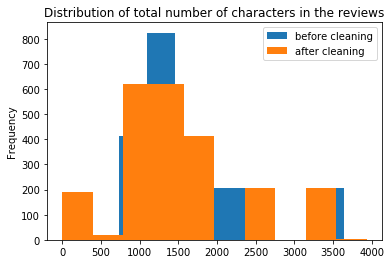

In [11]:
import matplotlib.pyplot as plt

data.clean_reviewtext.apply(len).plot.hist()
data.reviewText.apply(len).plot.hist()
plt.title("Distribution of total number of characters in the reviews")
plt.legend(["before cleaning","after cleaning"])
plt.show()

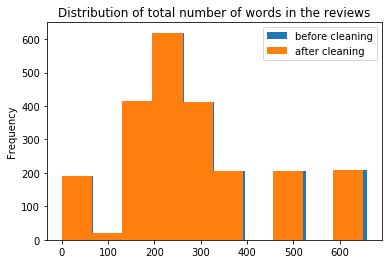

In [12]:
data.clean_reviewtext.apply(lambda x: len(x.split())).plot.hist()
data.reviewText.apply(lambda x: len(x.split())).plot.hist()
plt.title("Distribution of total number of words in the reviews")
plt.legend(["before cleaning","after cleaning"])
plt.show()

<a id='stemming'></a>

### Stemming and Lemmatization

Stemming changes word into its root stem. 

<img src = https://miro.medium.com/max/359/1*l65c30sY9fQsWPKIckqmCQ.png>

However, the root stem may not be lexicographically a correct word. Lemmatization on the other hand standardizes a word into its root word. Lemmatization deals with higher level of abstraction.

<img src = https://devopedia.org/images/article/227/6785.1570815200.png>


In [13]:
sample_text = data.clean_reviewtext.iloc[5]
print (sample_text)

I purchasaed a new dryer and did not want to reuse the cord from my old unit This unit installed in a pretty straight forward manor Quality was as expected No Complaints


In [14]:
import nltk

def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [15]:
stemmed_text = simple_stemmer(sample_text)
print (stemmed_text)

I purchasa a new dryer and did not want to reus the cord from my old unit thi unit instal in a pretti straight forward manor qualiti wa as expect No complaint


In [16]:
import spacy
import en_core_web_sm

nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)

def simple_lemmatizer(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [17]:
lemmatized_text = simple_lemmatizer(sample_text)
print (lemmatized_text)

I purchasaed a new dryer and do not want to reuse the cord from my old unit this unit instal in a pretty straight forward manor Quality be as expect no Complaints


Let us apply lemmatization on all the review texts

In [18]:
data['clean_reviewtext'] = data.clean_reviewtext.apply(simple_lemmatizer)

<a id='tokenization'></a>

### Tokenization

Tokenization splits a text into tokens or, words. Typically, words are splitted based on blank spaces. But tokenizations can also split words joined by other characters.

In [19]:
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
sample_text = "this is NLP training"
print (tokenizer.tokenize(sample_text))

['this', 'is', 'NLP', 'training']


In [20]:
sample_text = "this is NLP-AI training"
print (tokenizer.tokenize(sample_text))

['this', 'is', 'NLP', '-', 'AI', 'training']


In [21]:
sample_text = "this is NLP,AI training"
print (tokenizer.tokenize(sample_text))

['this', 'is', 'NLP', ',', 'AI', 'training']


<a id='stopword'></a>

### Stop word removal

Let us first see the most frequent words in the dataset

In [22]:
pd.Series(" ".join(data.clean_reviewtext.values).split()).value_counts().head(10)

the     43572
and     20127
I       19537
to      19087
be      17903
a       14973
of      11819
it      10597
you     9931 
have    8306 
dtype: int64

Top 10 words based on frequency are english words like - articles, conjuctions, prepositions etc. These words often do not play in significant roles in the downstream applications. We need to remove these words to reduce the model complexity.

In [23]:
stopword_list = nltk.corpus.stopwords.words('english')

print (stopword_list[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [24]:
def remove_stopwords(text):
    tokenizer = WordPunctTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [25]:
sample_text = data.clean_reviewtext.iloc[5]
print (sample_text)

I purchasaed a new dryer and do not want to reuse the cord from my old unit this unit instal in a pretty straight forward manor Quality be as expect no Complaints


In [26]:
sample_text_stopwordremoved = remove_stopwords(sample_text)
print (sample_text_stopwordremoved)

purchasaed new dryer want reuse cord old unit unit instal pretty straight forward manor Quality expect Complaints


In [27]:
data.clean_reviewtext = data.clean_reviewtext.apply(remove_stopwords)

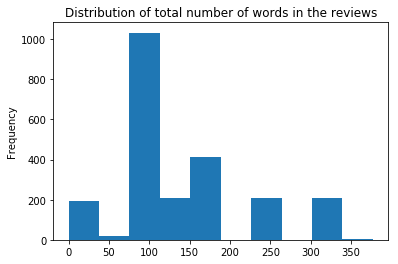

In [28]:
data.clean_reviewtext.apply(lambda x: len(x.split())).plot.hist()
plt.title("Distribution of total number of words in the reviews")
plt.show()

In [29]:
data.to_csv("amazon_reviews_cleaned.csv",index=False)

<strong>Reference - </strong> https://towardsdatascience.com/a-practitioners-guide-to-natural-language-processing-part-i-processing-understanding-text-9f4abfd13e72